# Clase 10: Introducción a ML

- ¿Qué es Machine Learning?
- ¿Dónde se puede utilizar?
- Divisiones de Machine Learning
- Primer algoritmo: regresión lineal

## ¿Qué es Machine Learning?

>"In particular, we define machine learning as a set of methods that can automatically detect patterns in data, and then use the uncovered patterns to predict future data, or to perform other kinds of decision making under uncertainty." (Murphy, 2012)

## Tipos de Machine Learning

El machine learning suele dividirse en dos grupos: supervisado y no supervisado.

### Aprendizaje supervisado

Desde esta aproximación, se tiene

$$D = \{(\textbf{x}_i,y_i)\}_{i=1}^N$$

Donde $D$ es el conjunto de entrenamiento, $\textbf{x}$ son los features o variables (inputs) y $y$ es el output. N es el tamaño del conjunto de entrenamiento. El aprendizaje supervisado se emplea cuando se conocen los valores de $y$. Cuando este output tiene valores continuos, se denomina problema de regresión. Cuando es de tipo categórico, se denomina problema de clasificación.

|Regresión|Clasificación|
|----|----|
|Salario|Trabaja o no trabaja|
|Valor de la vivienda|Tipo de vivienda|
|Demanda de transporte|Tipo de transporte|



### Aprendizaje no supervisado

Por el lado del aprendizaje no supervisado se tiene
 $$D = \{\textbf{x}_i\}^N_{i=1}$$
 
 cuyo objetivo es encontrar o descubrir patrones en los datos. 


 Al final, sin importar el algoritmo, el objetivo es descifrar comportamientos en los datos para que el computador aprenda de ellos y pueda entregar predicciones óptimas para la toma de decisiones.

##Aspectos importantes iniciales

- Overfitting vs. underfitting

![](https://miro.medium.com/max/1200/1*YQ5tjb1TqNHenYMFk2tPog.png)

- Varianza vs. sesgo

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Bias_and_variance_contributing_to_total_error.svg/1280px-Bias_and_variance_contributing_to_total_error.svg.png)





## Primer algoritmo: regresión lineal

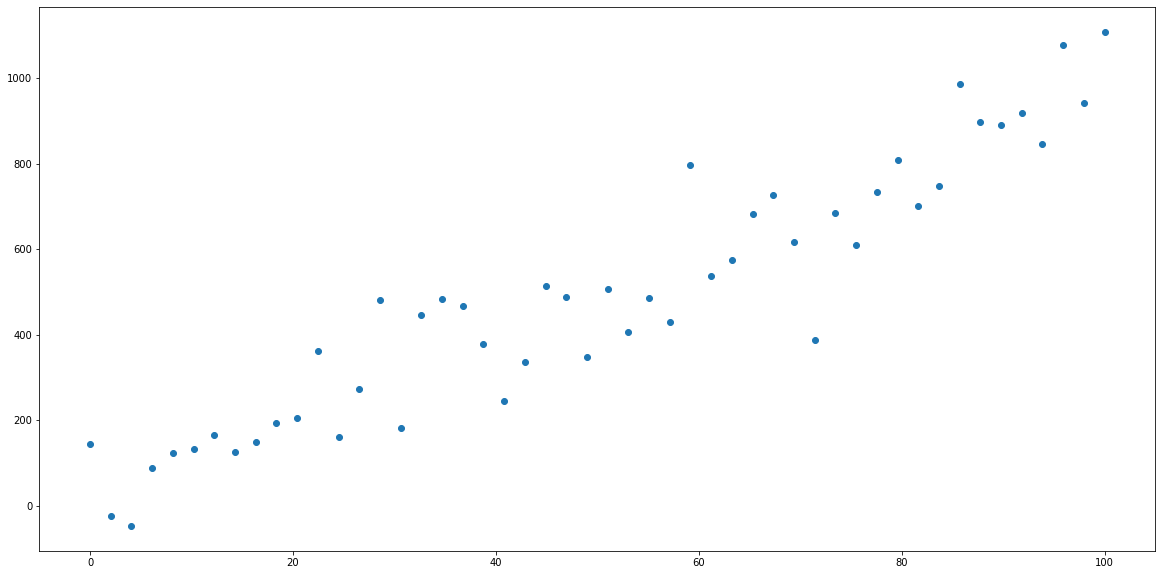

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

a = np.linspace(0,100, 50)
e = np.random.normal(0,100,50)
f = 5 + 10*a + e

plt.figure(figsize=(20,10))
plt.scatter(a,f)



#### Función de pérdida

$$J(\beta_0, \beta_1) =\sum_i^n (\hat{y}_i-y_i)^2$$

$$J(\beta_0, \beta_1) =\sum_{i=1}^n [(\beta_0+\beta_1x_i)-y_i]^2$$

#### Optimización con dos variables

$$\min_{\beta_0,\beta_1} J(\beta_0, \beta_1)$$

Encontramos el vector gradiente de la función de pérdida

$$\nabla J(\beta_0, \beta_1) = 
\begin{bmatrix}
\frac{\partial J}{\partial \beta_0} \\
\frac{\partial J}{\partial \beta_1} 
\end{bmatrix}=\textbf{0}$$

$$\frac{\partial J}{\partial \beta_0}=2\sum_{i=1}^n [(\beta_0+\beta_1x_i)-y_i]$$

$$\frac{\partial J}{\partial \beta_1}=2\sum_{i=1}^n [(\beta_0+\beta_1x_i)-y_i]\cdot x_i$$


$$\nabla J(\beta_0, \beta_1) = 
\begin{bmatrix}
2\sum_{i=1}^n [(\beta_0+\beta_1x_i)-y_i] \\
2\sum_{i=1}^n [(\beta_0+\beta_1x_i)-y_i]\cdot x_i
\end{bmatrix}=\textbf{0}$$

Al resolver el sistema de ecuaciones 2x2, encontramos el valor de los betas $\hat{\beta}_0,\hat{\beta}_1$


#### Optimización con varias variables

$$\min_{\textbf{b}} J(\textbf{b})$$

$$\nabla J(\textbf{b})=\begin{bmatrix}
\frac{\partial J}{\partial \beta_0} \\
\frac{\partial J}{\partial \beta_1}\\
\vdots \\
\frac{\partial J}{\partial \beta_k}
\end{bmatrix}=\begin{bmatrix}
2\sum_{i=1}^n [h(\textbf{b})-y_i]\cdot x_0^{(i)} \\
2\sum_{i=1}^n [h(\textbf{b})-y_i]\cdot x_1^{(i)}\\
\vdots \\
2\sum_{i=1}^n [h(\textbf{b})-y_i]\cdot x_k^{(i)}
\end{bmatrix}=\textbf{0}$$

#### Optimización con ecuaciones normales

$$\textbf{y} = \textbf{X}\textbf{b}$$

$$\begin{bmatrix}y_i\\\vdots\\ y_n\end{bmatrix}_{n\cdot1}=\begin{bmatrix}
1 & x_{1i} & x_{2i} & \ldots & x_{ki} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{1n} & x_{2n} & \ldots & x_{kn} 
\end{bmatrix}_{n\cdot k+1}\begin{bmatrix}\beta_0\\ \vdots \\ \beta_k\end{bmatrix}_{k+1\cdot 1}$$

$$\min_{\textbf{b}} \textbf{e}'\textbf{e}$$

$$\min_{\textbf{b}} (\textbf{X}\textbf{b}-\textbf{y})'(\textbf{X}\textbf{b}-\textbf{y})$$

$$\textbf{b}=(\textbf{X}'\textbf{X})^{-1}\textbf{X}'\textbf{y}$$

¡Esto es computacionalmente costoso!

### Aparece el descenso del gradiente

Si quiero optimizar una función que depende de una variable

$$\min_{x} f(x)$$

derivo e igualo a 0

$$f'(x)=0$$

Si quiero optimizar una función que depende de varias variables, encuentro el vector gradiente 

$$\min_{\textbf{x}} f(\textbf{x})$$

y lo igualo a un vector nulo

$$\nabla f (\textbf{x})=\textbf{0}$$

Ambos procesos me permitirán encontrar los puntos críticos que minimizan la función. Puedo llegar al mismo resultado a través de un método numérico: el descenso del gradiente. El vector gradiente me entrega la dirección en la cual la función cambia más rápido. Puedo aprovechar esto para poco a poco ir acercándome al punto donde ya no hay cambio, el extremo.

Suponga la función $f(x) = x^2$ que por definición es convexa. Si se plantea el problema

$$\min_{x} x^2$$

derivo la función e igualo a 0. El punto crítico es 0.

$$x^*=0$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

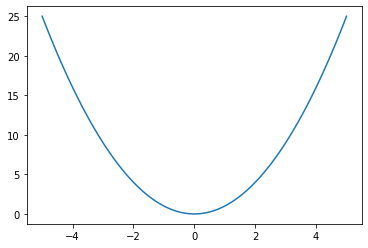

In [ ]:
x = np.linspace(-5,5,100)
y = x**2

plt.plot(x,y)

El punto donde la función encuentra el mínimo es cuando 

$$x=0$$

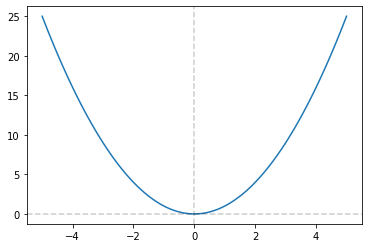

In [ ]:
x = np.linspace(-5,5,100)
y = x**2

plt.plot(x,y)
plt.axhline(0,alpha=0.2,color='k', ls='--')
plt.axvline(0,alpha=0.2,color='k', ls='--')

Con el descenso del gradiente, puedo llegar a la misma respuesta pero en lugar de ser un proceso analítico es un método numérico. El descenso del gradiente consta de tres partes:

- Punto de partida
- Tasa de aprendizaje o learning rate
- El gradiente de la función que quiere optimizarse

A través de un proceso iterativo se busca un punto de convergencia con la siguiente operación:


$$x_{min}:= x_{min} - r\cdot\nabla f(x)$$

Donde $r$ es la tasa de aprendizaje y puede optimizarse o seleccionarse un número arbitrario, usualmente de $0.01$ o inferior.

Para el ejercicio anteriormente planteado, se debe iterar sobre la siguiente operación

$$x_{min} := x_{min} - r\cdot 2x$$

In [ ]:
grad = lambda x: 2*x #creamos el gradiente para la función
x = -1 #generamos un número aleatorio
r = 0.1 #seleccionamos una tasa de aprendizaje
X = []
for _ in range(1000):
  X.append(x)
  x = x - r * grad(x)
print(x)

-1.2302319221611202e-97


Podemos ver el comportamiento gráficamente

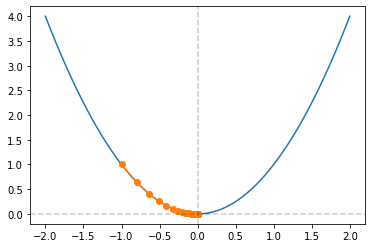

In [ ]:
vec = np.linspace(-2,2,100)
y = vec**2
y_ = [i**2 for i in X]

plt.plot(vec,y)
plt.plot(X, y_, 'o-')
plt.scatter(x,x**2)
plt.axhline(0,alpha=0.2,color='k', ls='--')
plt.axvline(0,alpha=0.2,color='k', ls='--')

Si la tasa de aprendizaje es muy grande o muy pequeña, no convergerá fácilmente.

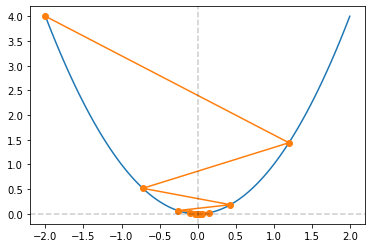

In [ ]:
grad = lambda x: 2*x #creamos el gradiente para la función
x = -2#generamos un número aleatorio
r = 0.8 #seleccionamos una tasa de aprendizaje
X = []
for _ in range(1000):
  X.append(x)
  x = x - r * grad(x)

vec = np.linspace(-2,2,100)
y = vec**2
y_ = [i**2 for i in X]

plt.plot(vec,y)
plt.plot(X, y_, 'o-')
plt.scatter(x,x**2)
plt.axhline(0,alpha=0.2,color='k', ls='--')
plt.axvline(0,alpha=0.2,color='k', ls='--')

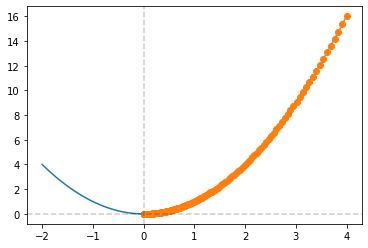

In [ ]:
grad = lambda x: 2*x #creamos el gradiente para la función
x = 4#generamos un número aleatorio
r = 0.01 #seleccionamos una tasa de aprendizaje
X = []
for _ in range(1000):
  X.append(x)
  x = x - r * grad(x)

vec = np.linspace(-2,2,100)
y = vec**2
y_ = [i**2 for i in X]

plt.plot(vec,y)
plt.plot(X, y_, 'o-')
plt.scatter(x,x**2)
plt.axhline(0,alpha=0.2,color='k', ls='--')
plt.axvline(0,alpha=0.2,color='k', ls='--')

#### Descenso del gradiente con varias variables

Dado que el ser humano no puede ver más allá de las tres dimensiones, analizaremos el descenso del gradiente con dos variables independientes. Supongamos la función:

$$x^2 + y^2$$

Esta función es convexa, dado que su matriz hessiana es definida positiva, por tanto el punto extremo que encontraremos será un mínimo.

$$\min_{x,y} x^2 + y^2$$

Encontramos el vector gradiente e igualamos a un vector nulo

$$\nabla f(x,y)=\begin{bmatrix}
2x \\
2y
\end{bmatrix}=\textbf{0}$$

Al solucionar el sistema de ecuaciones encontramos que el punto mínimo se da cuando se tiene que
$$(x,y)=(0,0)$$

Gráficamente

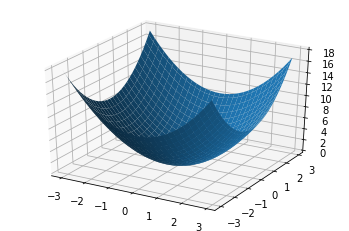

In [ ]:
from mpl_toolkits import mplot3d

%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.arange(-3,3,0.1)
y = np.arange(-3,3,0.1)

X, Y=np.meshgrid(x, y)
z=X**2+Y**2

ax.plot_surface(X,Y,z)

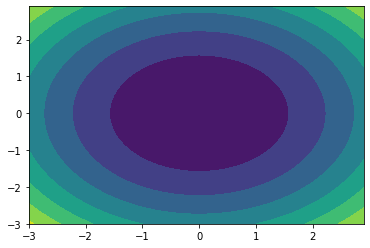

In [ ]:
plt.contourf(X,Y,z)

In [ ]:
def grad(x,y):
  return np.array([2*x,2*y])

p = np.random.randint(-3,3,2)
X_ = []
Y_ = []
lr = 0.8
for _ in range(1000):
  X_.append(p[0])
  Y_.append(p[1])
  p = p - lr * grad(p[0],p[1])
print(p)

[-2.83322052e-222  2.83322052e-222]


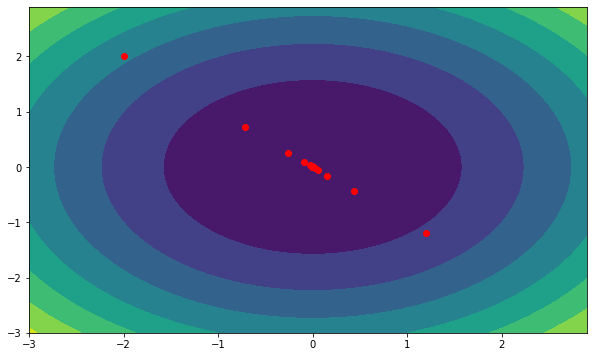

In [ ]:
plt.figure(figsize=(10,6))
plt.contourf(X,Y,z)
plt.scatter(X_,Y_, color='r')

El descenso del gradiente tiene un problema, es útil cuando la función tiene un solo punto mínimo. Ante varios, puede no converger hacia el global.

# ¡Vamos a crear un objeto!

In [ ]:
class Regression:

  def __init__(self,X,y):
    self.X = np.c_[np.ones(len(X)),X]
    self.b = None
    self.y = y
    self.error = []


  def fit(self, lr=0.01, iter: int=10000, method: str='gradiente'):
    n, k = self.X.shape
    if method =='gradiente':
      self.b = np.random.randn(k,1)
      for _ in range(iter):
        Yp = np.dot(self.X,self.b).T
        pred = Yp - self.y
        self.b = self.b - (1/n)*(lr)*(self.X.T.dot(pred.T))
        self.error.append((1/2*n)*np.sum(np.square(pred)))

    elif method == 'normales':
      self.b = np.linalg.inv((self.X.T @ self.X)) @ (self.X.T @ self.y)
    else:
      print('Método no válido')

  def predict(self, X_test):
    X_test = np.c_[np.ones(len(X_test)),X_test]
    return np.dot(X_test,self.b)

   

In [ ]:
X = np.arange(0,10,0.1)
e = np.random.normal(0,5,100)
y = 35 + 4*X + e

In [ ]:
re = Regression(X,y)

In [ ]:
re.fit()

In [ ]:
re.b

array([[36.80902017],
       [ 3.75547275]])

In [ ]:
re.fit(method='normales')

In [ ]:
re.b

array([36.80902017,  3.75547275])

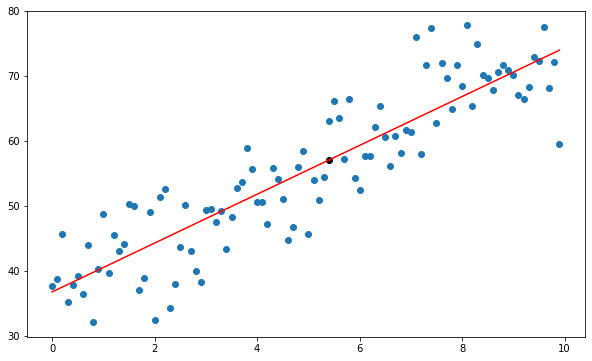

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,re.b[0]+re.b[1]*X, color='r')
plt.scatter(np.array([5.4]), re.predict(np.array([5.4])), color='k')

In [ ]:
re.b[0]

36.80902017426777

# scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston

In [ ]:
reg = LinearRegression()

In [ ]:
boston_data = load_boston()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(boston_data['data'], boston_data['target'], test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [ ]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = reg.predict(X_test)

### Evaluar el modelo

- Error absoluto medio

$$\text{MAE} = \frac{1}{n}\sum_{i=1}^n |y_i-\hat{y}_i|$$

- Error cuadrático medio

$$\text{MSE} = \frac{1}{n}\sum_{i=1}^n (y_i-\hat{y}_i)^2$$

- Raíz cuadrada del error cuadrático medio

$$\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^n (y_i-\hat{y}_i)^2}$$

El primero no es diferenciable, por tanto, hace difícil la aplicación del descenso del gradiente. MSE/RMSE penalizan los errores grandes.

- Coeficiente de determinación

$$R^2=1-\frac{\sum_{i=1}^n (y_i-\hat{y}_i)^2}{\sum_{i=1}^n (y_i-\bar{y}_i)^2}$$

Es un número entre 0 y 1 que indica el porcentaje de varianza de las variables de respuesta explicado por el modelo.

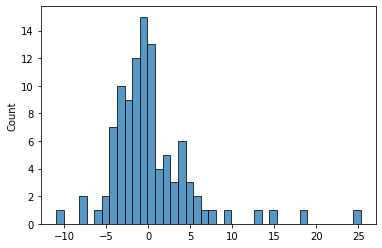

In [ ]:
sns.histplot((y_test - y_pred), bins = 40)

In [ ]:
mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(24.291119474973616, 3.1890919658878523, 4.9286021826653466)

In [ ]:
r2_score(y_pred, y_test)

0.6333247469014329

In [ ]:
reg.score(X_test,y_test)

0.6687594935356307

### No hay que olvidar lo aprendido

El objetivo del Machine Learning es enseñarle a un computador a comprender los datos para que pueda predecir a partir de la inyección de nueva información. Es decir, la capacidad de predecir es lo importante. Pero después de tres años no se puede olvidar lo aprendido:

- Supuestos de la regresión lineal

  - Linealidad de los parámetros
  - Rango completo
  - Exogeneneidad de las variables independientes
  - Homocedasticidad
  - Muestreo aleatorio
  - Distribución normal de los errores

- Causalidad

  - Significancia estadística de los parámetros y del modelo
  - Porque unas variables guarden una relación no quiere decir que haya causalidad entre ellas

- Estructuras de datos

  - Corte transversal
  - Panel de datos
  - Series de tiempo

## Regresión polinomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

X = np.arange(0,60).reshape(60,1)
e = np.random.normal(0,25,60).reshape(60,1)
y = 35 + 4*X + e

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
poly3 = PolynomialFeatures(3,include_bias=False)
poly10 = PolynomialFeatures(10, include_bias=False)

X_3_train = poly3.fit_transform(X_train)
X_3_test = poly3.fit_transform(X_test)

X_10_train = poly10.fit_transform(X_train)
X_10_test = poly10.fit_transform(X_test)

In [ ]:
X_3_train[:6]

array([[3.10000e+01, 9.61000e+02, 2.97910e+04],
       [3.00000e+00, 9.00000e+00, 2.70000e+01],
       [5.20000e+01, 2.70400e+03, 1.40608e+05],
       [1.70000e+01, 2.89000e+02, 4.91300e+03],
       [8.00000e+00, 6.40000e+01, 5.12000e+02],
       [6.00000e+00, 3.60000e+01, 2.16000e+02]])

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)
model = reg.predict(np.sort(X_train, axis=0))

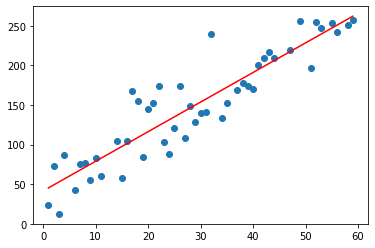

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(np.sort(X_train, axis=0),model, color='red')

In [ ]:
reg3 = LinearRegression()
reg3.fit(X_3_train,y_train)
model3 = reg3.predict(np.sort(X_3_train, axis=0))

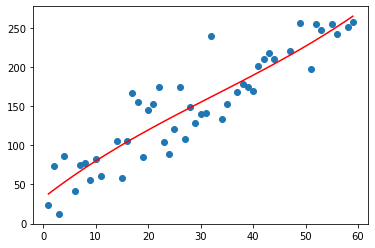

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(np.sort(X_train,axis=0),model3, color='red')

In [ ]:
reg10 = LinearRegression()
reg10.fit(X_10_train,y_train)
model10 = reg10.predict(np.sort(X_10_train, axis=0))

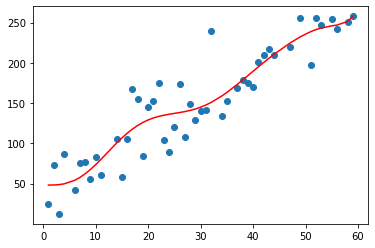

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(np.sort(X_train,axis=0),model10, color='red')

Text(0.5, 1.0, 'Pol10')

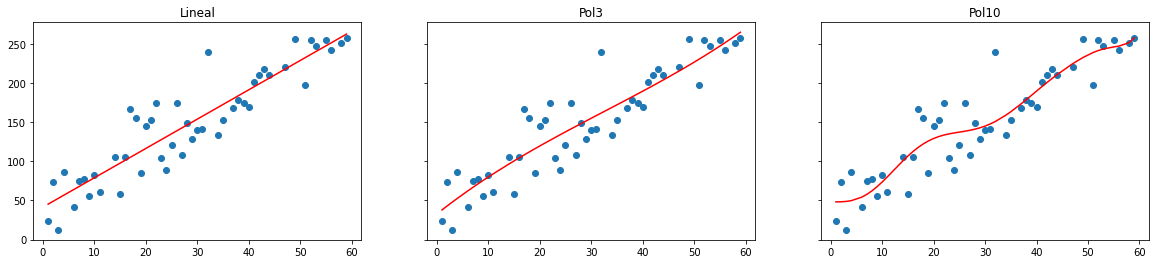

In [ ]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(20,4))

ax[0].plot(np.sort(X_train,axis=0),model, color='red')
ax[0].scatter(X_train,y_train)
ax[0].set_title('Lineal')
ax[1].plot(np.sort(X_train,axis=0),model3, color='red')
ax[1].scatter(X_train,y_train)
ax[1].set_title('Pol3')
ax[2].plot(np.sort(X_train,axis=0),model10, color='red')
ax[2].scatter(X_train,y_train)
ax[2].set_title('Pol10')

In [ ]:
y_pred = reg.predict(np.sort(X_test, axis=0))
y_pred_3 = reg3.predict(np.sort(X_3_test, axis=0))
y_pred_10 = reg10.predict(np.sort(X_10_test, axis=0))

Text(0.5, 1.0, 'Pol10')

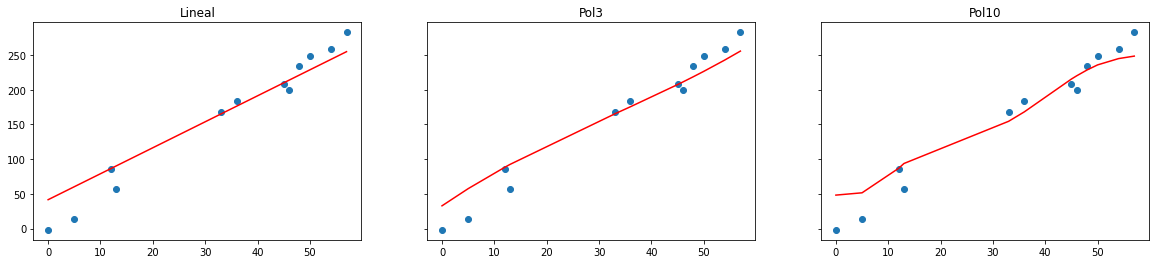

In [ ]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(20,4))

ax[0].plot(np.sort(X_test,axis=0),y_pred, color='red')
ax[0].scatter(X_test,y_test)
ax[0].set_title('Lineal')
ax[1].plot(np.sort(X_test,axis=0),y_pred_3, color='red')
ax[1].scatter(X_test,y_test)
ax[1].set_title('Pol3')
ax[2].plot(np.sort(X_test,axis=0),y_pred_10, color='red')
ax[2].scatter(X_test,y_test)
ax[2].set_title('Pol10')


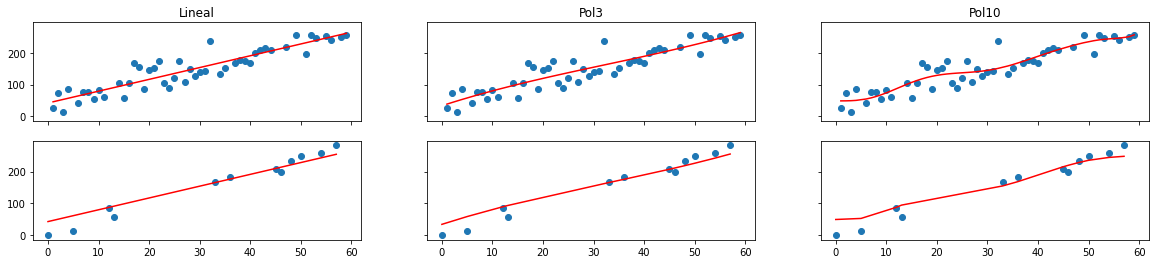

In [ ]:
fig, ax = plt.subplots(2,3, sharex=True, sharey=True, figsize=(20,4))

ax[0, 0].plot(np.sort(X_train,axis=0),model, color='red')
ax[0, 0].scatter(X_train,y_train)
ax[0, 0].set_title('Lineal')
ax[0, 1].plot(np.sort(X_train,axis=0),model3, color='red')
ax[0, 1].scatter(X_train,y_train)
ax[0, 1].set_title('Pol3')
ax[0, 2].plot(np.sort(X_train,axis=0),model10, color='red')
ax[0, 2].scatter(X_train,y_train)
ax[0, 2].set_title('Pol10')

ax[1, 0].plot(np.sort(X_test,axis=0),y_pred, color='red')
ax[1, 0].scatter(X_test,y_test)

ax[1, 1].plot(np.sort(X_test,axis=0),y_pred_3, color='red')
ax[1, 1].scatter(X_test,y_test)

ax[1, 2].plot(np.sort(X_test,axis=0),y_pred_10, color='red')
ax[1, 2].scatter(X_test,y_test)


In [ ]:
print('Evaluación en el entrenamiento')
print(f'El error cuadrático medio del primer modelo es: {mean_squared_error(y_train,reg.predict(X_train))}')
print(f'El error cuadrático medio del segundo modelo es: {mean_squared_error(y_train,reg3.predict(X_3_train))}')
print(f'El error cuadrático medio del tercer modelo es: {mean_squared_error(y_train,reg10.predict(X_10_train))}')

Evaluación en el entrenamiento
El error cuadrático medio del primer modelo es: 743.8261845044666
El error cuadrático medio del segundo modelo es: 737.362149836319
El error cuadrático medio del tercer modelo es: 694.9419651024176


In [ ]:
print('Evaluación en el testeo')
print(f'El error cuadrático medio del primer modelo es: {mean_squared_error(y_test,reg.predict(X_test))}')
print(f'El error cuadrático medio del segundo modelo es: {mean_squared_error(y_test,reg3.predict(X_3_test))}')
print(f'El error cuadrático medio del tercer modelo es: {mean_squared_error(y_test,reg10.predict(X_10_test))}')

Evaluación en el testeo
El error cuadrático medio del primer modelo es: 585.8951999225352
El error cuadrático medio del segundo modelo es: 528.11682511485
El error cuadrático medio del tercer modelo es: 646.602833799638


In [ ]:
print('Evaluación en el entrenamiento')
print(f'El error cuadrático medio del primer modelo es: {mean_absolute_error(y_train,reg.predict(X_train))}')
print(f'El error cuadrático medio del segundo modelo es: {mean_absolute_error(y_train,reg3.predict(X_3_train))}')
print(f'El error cuadrático medio del tercer modelo es: {mean_absolute_error(y_train,reg10.predict(X_10_train))}')

Evaluación en el entrenamiento
El error cuadrático medio del primer modelo es: 21.806666226959972
El error cuadrático medio del segundo modelo es: 21.90694735744781
El error cuadrático medio del tercer modelo es: 19.888704736837962


In [ ]:
print('Evaluación en el testeo')
print(f'El error cuadrático medio del primer modelo es: {mean_absolute_error(y_test,reg.predict(X_test))}')
print(f'El error cuadrático medio del segundo modelo es: {mean_absolute_error(y_test,reg3.predict(X_3_test))}')
print(f'El error cuadrático medio del tercer modelo es: {mean_absolute_error(y_test,reg10.predict(X_10_test))}')

Evaluación en el testeo
El error cuadrático medio del primer modelo es: 18.67305924015466
El error cuadrático medio del segundo modelo es: 18.276101030664375
El error cuadrático medio del tercer modelo es: 20.58128814886944


In [ ]:
print('Evaluación en el entrenamiento')
print(f'El error cuadrático medio del primer modelo es: {r2_score(y_train,reg.predict(X_train))}')
print(f'El error cuadrático medio del segundo modelo es: {r2_score(y_train,reg3.predict(X_3_train))}')
print(f'El error cuadrático medio del tercer modelo es: {r2_score(y_train,reg10.predict(X_10_train))}')

Evaluación en el entrenamiento
El error cuadrático medio del primer modelo es: 0.8381955746498121
El error cuadrático medio del segundo modelo es: 0.8396016953762827
El error cuadrático medio del tercer modelo es: 0.8488293533387277


In [ ]:
print('Evaluacion en el testeo')
print(f'El error cuadrático medio del primer modelo es: {r2_score(y_test,reg.predict(X_test))}')
print(f'El error cuadrático medio del segundo modelo es: {r2_score(y_test,reg3.predict(X_3_test))}')
print(f'El error cuadrático medio del tercer modelo es: {r2_score(y_test,reg10.predict(X_10_test))}')

Evaluacion en el testeo
El error cuadrático medio del primer modelo es: 0.9339547995160392
El error cuadrático medio del segundo modelo es: 0.9404678829963536
El error cuadrático medio del tercer modelo es: 0.9271115144868219


## Regresión Ridge (L2)

Ante la presencia de overfitting en una regresión lineal es posible emplear distintos métodos para penalizar los coeficientes de regresión, entre ellos, la regresión Ridge. El proceso de optimización que se realiza es el siguiente 

$$\min_{\textbf{b}}||\textbf{X}\textbf{b}-\textbf{y}||^2_2+\lambda||\textbf{b}||^2_2$$

O escrito en forma matricial

$$\min_{\textbf{b}}(\textbf{y}-\textbf{X}\textbf{b})'(\textbf{y}-\textbf{X}\textbf{b})+\lambda\textbf{b}'\textbf{b}$$

$$\textbf{b}_{ridge}=(\textbf{X}'\textbf{X}-\lambda\textbf{I})^{-1}\textbf{X}'\textbf{y}$$

Con variables correlacionadas en un modelo, los estimadores pueden ser pobremente estimados. Al establecer una restricción de tamaño en los coeficientes se soluciona el problema. Usualmente se normalizan los inputs antes de resolver el problema de optimización.

En la regresión de Ridge, el valor de $\lambda$ es crítico. El valor óptimo puede encontrarse a través de validación cruzada, grid search, entre otros métodos.

NOTA: el intercepto no es regularizado

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

[[3.74071]] [41.55157506]
[[2.129572]] [87.56970418]
[[1.48847861]] [105.88093411]
[[1.14406539]] [115.71823679]
[[0.92908748]] [121.85854322]
[[0.78212139]] [126.05626221]
[[0.6753002]] [129.10734247]
[[0.59415168]] [131.42514696]
[[0.53041368]] [133.24566355]
[[0.47902588]] [134.71342774]


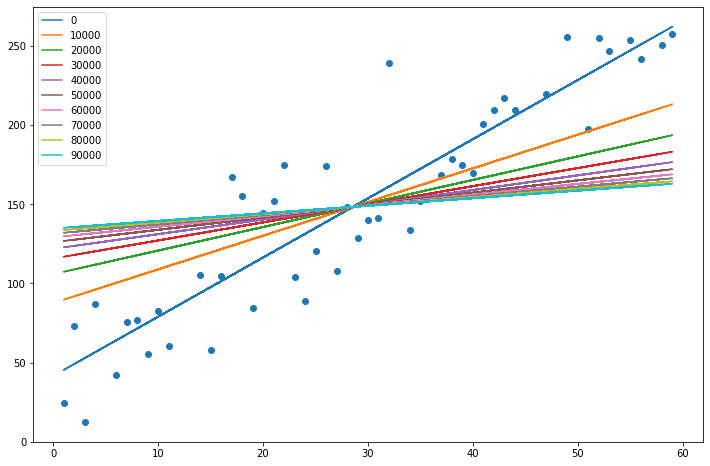

In [ ]:
plt.figure(figsize=(12,8))
for i in np.arange(0,100000,10000):
  ridge = Ridge(alpha=i)
  ridge.fit(X_train,y_train)
  model = ridge.predict(X_train)
  print(ridge.coef_, ridge.intercept_)
  plt.plot(X_train, model, label=i)

plt.scatter(X_train, y_train)
plt.legend()
plt.show()


In [ ]:
ridge10 = Ridge(alpha=10000000)
ridge10.fit(X_10_train,y_train)
model_r10 = ridge10.predict(X_10_train)
yridge_10 = ridge10.predict(X_10_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.69093e-29): result may not be accurate.
  overwrite_a=True).T


In [ ]:
mean_squared_error(y_train,model_r10), mean_squared_error(y_test,yridge_10)

(699.3622590541144, 679.5430212929484)

## Regresión Lasso (L1)

Sucede que con la regresión Ridge, el tamaño de los coeficientes es penalizado a través del $\lambda$. No obstante, aunque estos coeficientes pueden asintóticamente tender a 0, nunca van a llegar a serlo. Este problema es solucionado por Lasso, donde el problema de overfitting presente en la regresión lineal es solucionado eliminando aquellas variables que no son relevantes.

$$ \min_{\textbf{b}}||\textbf{X}\textbf{b}-\textbf{y}||^2_2+\lambda||\textbf{b}||_1$$


Al igual que en la regresión Ridge, el valor de $\lambda$ es crítico.


In [ ]:
from sklearn.linear_model import Lasso

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17851.828428107197, tolerance: 22.065933474280545
  positive)


[3.74071] [41.55157506]
[0.10924678] [145.2752434]
[0.] [148.39560441]
[0.] [148.39560441]
[0.] [148.39560441]
[0.] [148.39560441]
[0.] [148.39560441]
[0.] [148.39560441]
[0.] [148.39560441]
[0.] [148.39560441]


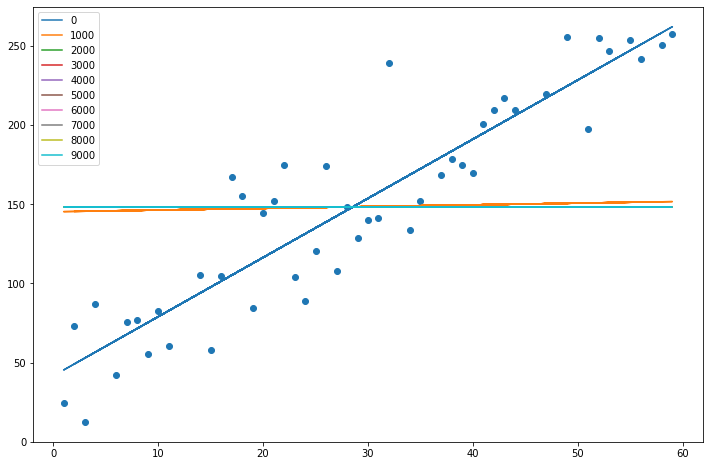

In [ ]:
plt.figure(figsize=(12,8))
for i in np.arange(0,10000,1000):
  lasso = Lasso(alpha=i)
  lasso.fit(X_train,y_train)
  model = lasso.predict(X_train)
  print(lasso.coef_, lasso.intercept_)
  plt.plot(X_train, model, label=i)

plt.scatter(X_train, y_train)
plt.legend()
plt.show()

In [ ]:
lasso10 = Lasso(alpha=5)
lasso10.fit(X_10_train,y_train)
model_l10 = lasso10.predict(X_10_train)
ylasso_10 = lasso10.predict(X_10_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18536.450762511035, tolerance: 22.065933474280545
  positive)


In [ ]:
mean_squared_error(y_train,model_l10), mean_squared_error(y_test,ylasso_10)

(727.1835013528917, 559.1439314706921)

In [ ]:
lasso10.coef_

array([ 4.50285279e+00, -1.32183600e-02, -7.80281217e-04,  9.78623710e-06,
        1.60870504e-07,  1.19227377e-09, -1.88497802e-12, -2.42279567e-13,
       -5.30039489e-15, -8.34867788e-17])

## Elastic Net (L1 y L2)

Es un modelo de regresión lineal que combina la regularización de los coeficientes de Lasso y de Ridge. Es útil cuando se tienen varias variables que están correlacionadas entre sí. Lasso elimina una de estas variables de manera aleatoria mienras que Elastic-Net las elimina todas. 

La función objetivo a minimizar es

$$\min_{\textbf{b}}\frac{1}{2n_{muestras}}||\textbf{X}\textbf{b}-\textbf{y}||^2_2+\lambda\rho||\textbf{b}||_1+\frac{\lambda(1-\rho)}{2}||\textbf{b}||^2_2$$

A través de validación cruzada se pueden encontrar los valores óptimos para $\lambda$ y $\rho$. Este último se emplea para controlar la combinación convexa de las dos formas de regularización.

In [ ]:
from sklearn.linear_model import ElasticNet

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13485.791733943905, tolerance: 20.506236912717142
  positive)


[3.67063272] [47.2914174]
[2.78803247] [72.50068714]
[2.22979008] [88.44548523]
[1.84485734] [99.44012658]
[1.56337141] [107.48006852]
[1.34857141] [113.6152936]
[1.17926957] [118.45097728]
[1.0423944] [122.3604745]
[0.92944397] [125.58662094]
[0.83464966] [128.29418347]


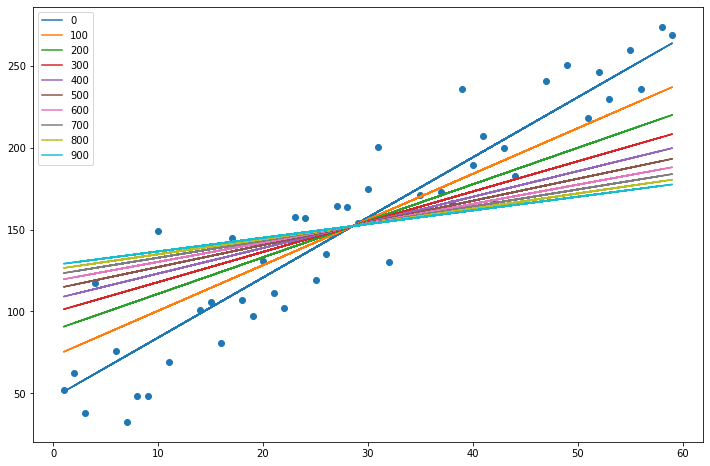

In [ ]:
plt.figure(figsize=(12,8))
for i in np.arange(0,1000,100):
  en = ElasticNet(alpha=i,l1_ratio=0.2)
  en.fit(X_train,y_train)
  model = en.predict(X_train)
  print(en.coef_, en.intercept_)
  plt.plot(X_train, model, label=i)

plt.scatter(X_train, y_train)
plt.legend()
plt.show()

## Un ejercicio

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
X = load_boston()['data']
y = load_boston()['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [ ]:
load_boston()['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Regresión lineal

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

reg = LinearRegression()
reg.fit(X_scaled, y_train)
y_pred_d = reg.predict(X_scaled)
y_pred = reg.predict(scaler.transform(X_test))
print(f'Evaluación en entrenamiento: {mean_squared_error(y_pred_d, y_train)}')
print(f'Evaluación en testeo: {mean_squared_error(y_pred, y_test)}')

Evaluación en entrenamiento: 22.340057992152875
Evaluación en testeo: 22.098694827097976


### Ridge

In [ ]:
ridge = Ridge()
ridge.fit(X_scaled, y_train)
y_pred = ridge.predict(scaler.transform(X_test))
print(f'Evaluación en entrenamiento: {ridge.score(X_scaled, y_train)}')
print(f'Evaluación en testeo: {ridge.score(scaler.transform(X_test), y_test)}')

Evaluación en entrenamiento: 0.748071438977636
Evaluación en testeo: 0.6841670326524789


In [ ]:
X_test.shape

In [ ]:
ridge_coef = []
for i in np.arange(0,100,10):
  ridge = Ridge(alpha=i)
  ridge.fit(X_scaled, y_train)
  y_pred = ridge.predict(scaler.transform(X_test))
  ridge_coef.append(ridge.coef_)
  print(f'Evaluación en entrenamiento: {ridge.score(X_scaled, y_train)}')
  print(f'Evaluación en testeo: {ridge.score(scaler.transform(X_test), y_test)}')

Evaluación en entrenamiento: 0.748087259862344
Evaluación en testeo: 0.6844267283527126
Evaluación en entrenamiento: 0.7470287624816856
Evaluación en testeo: 0.6819489326494793
Evaluación en entrenamiento: 0.7450045402600405
Evaluación en testeo: 0.6799246794498656
Evaluación en entrenamiento: 0.7426348532803941
Evaluación en testeo: 0.6782578239105292
Evaluación en entrenamiento: 0.7400945762154166
Evaluación en testeo: 0.6768013694242228
Evaluación en entrenamiento: 0.7374502772643075
Evaluación en testeo: 0.6754556863523127
Evaluación en entrenamiento: 0.7347333292529744
Evaluación en testeo: 0.6741582482738067
Evaluación en entrenamiento: 0.7319613881269103
Evaluación en testeo: 0.672870395096067
Evaluación en entrenamiento: 0.7291460188979866
Evaluación en testeo: 0.6715685325073962
Evaluación en entrenamiento: 0.7262957626439384
Evaluación en testeo: 0.670238662250675


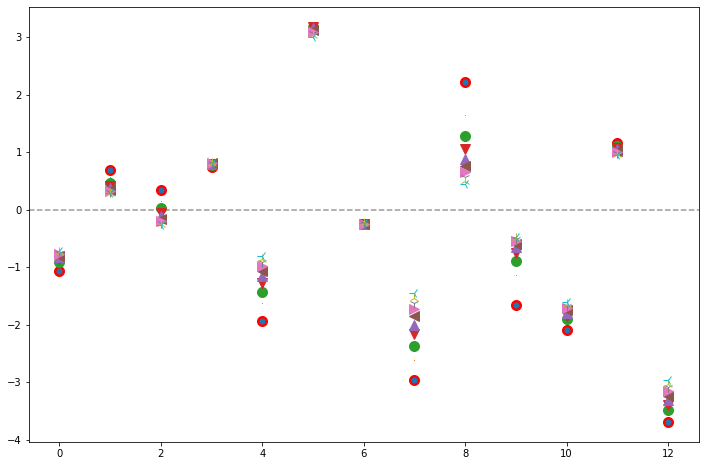

In [ ]:
from matplotlib.lines import Line2D as ld

mark = [i for i in ld.markers.keys()]

plt.figure(figsize=(12,8))
plt.plot(reg.coef_, 'ro', markersize=10)
plt.axhline(0, alpha=0.4, color='k', ls='--')
for i, j in zip(ridge_coef, mark[:10]):
  plt.plot(i, j, markersize=10)

### Lasso

In [ ]:
lasso = Lasso()
lasso.fit(X_scaled, y_train)
y_pred = lasso.predict(scaler.transform(X_test))
print(f'Evaluación en entrenamiento: {lasso.score(X_scaled, y_train)}')
print(f'Evaluación en testeo: {lasso.score(scaler.transform(X_test), y_test)}')

Evaluación en entrenamiento: 0.6786122566163197
Evaluación en testeo: 0.6286163762112531


In [ ]:
lasso_coef = []
for i in np.arange(0,1,0.1):
  lasso = Lasso(alpha=i)
  lasso.fit(X_scaled, y_train)
  y_pred = lasso.predict(scaler.transform(X_test))
  lasso_coef.append(lasso.coef_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4233.440989512974, tolerance: 3.361037625329816
  positive)


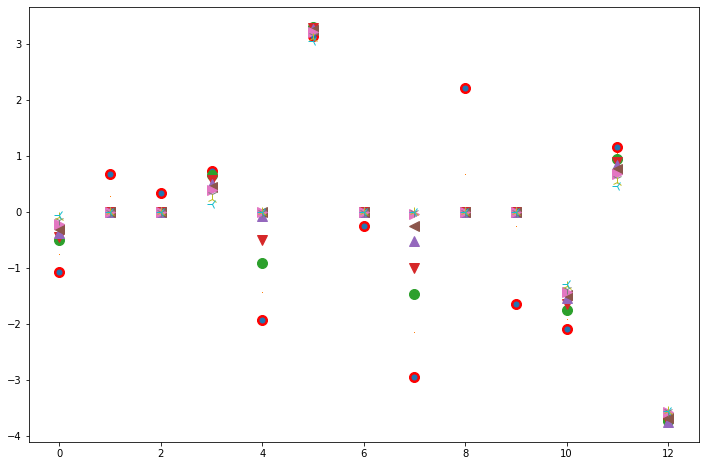

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(reg.coef_, 'ro', markersize=10)
for i, j in zip(lasso_coef, mark[:10]):
  plt.plot(i, j, markersize=10)

### ElasticNet

In [ ]:
en = ElasticNet()
en.fit(X_train, y_train)
y_pred = en.predict(X_test)
print(f'Evaluación en entrenamiento: {en.score(X_train, y_train)}')
print(f'Evaluación en testeo: {en.score(X_test, y_test)}')